# **Importacion de librerias**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# **Lectura archivo CSV**

In [42]:
df = pd.read_csv('netflix1.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# **Limpieza de datos**

In [44]:
df['show_id'].nunique()

8790

cada pelicula tiene id unico

In [45]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

no hay valores nulo

In [46]:
df.duplicated().sum()

0

no hay valores duplicados

In [47]:
df.rename(columns={'date_added':'Date', 'listed_in':'Category'}, inplace=True)

In [48]:
df['Date'] = pd.to_datetime(df['Date'])

-se renombra la date_added y listed_in por date y category

-se cambia el tipo de dato de date a datetime

In [49]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [50]:
#utilizando value_counts en cada columna

df['title'].value_counts()

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

despues de hacer value_counts en las columas se percato que en title aparecen tres peliculas con nombre de fecha que se van a eliminar

In [51]:
df = df.drop(df[(df['title'] == '9-Feb') | (df['title'] == '15-Aug') | (df['title'] == '22-Jul')].index)

utilizando drop para eliminar las peliculas identificadas

In [52]:
#para verificar que se eliminaron correctamente las filas

df['title'].value_counts()

Dick Johnson Is Dead           1
Shahanpan Dega Deva            1
Set Up                         1
Sex and the City 2             1
Sex and the City: The Movie    1
                              ..
Mercy Black                    1
The Trap                       1
Pinky Memsaab                  1
Love O2O                       1
YOM                            1
Name: title, Length: 8784, dtype: int64

# **Visualizacion de datos**

Grafico de tipos de contenido

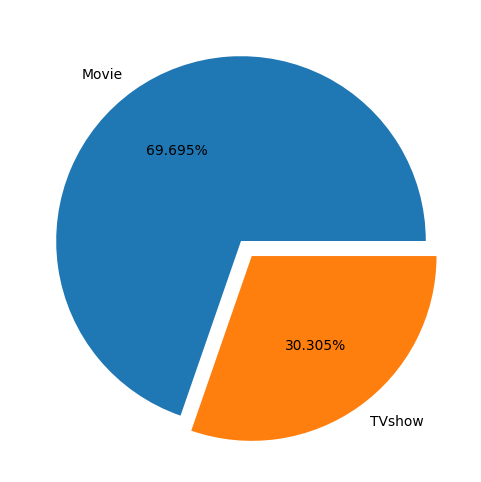

In [53]:
tipo = df['type'].value_counts().reset_index()

plt.figure(figsize=(20,6))
plt.pie(tipo['type'],labels=['Movie','TVshow'],autopct='%1.3f%%',explode=[0,0.1])
plt.show()

grafico sobre contenido con y sin director

In [54]:
director =  df['director'].value_counts()
director

Not Given                         2586
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [55]:
condirector = director.sum()-director[0]
condirector

6198

In [56]:
datos = {'con director': condirector, 'sin director': director[0]}
colores = ['lightblue', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Con Director', 'Sin Director'], values=[condirector, director[0]], marker=dict(colors=colores))])

fig.show()

numero de peliculas por director

In [57]:
# Renombrar la columna 'director' a 'director_name'
df.rename(columns={'director': 'director_name'}, inplace=True)

d = df.groupby(['director_name', 'type'])['director_name'].count().reset_index(name='count').head(15)
d

,director_name,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


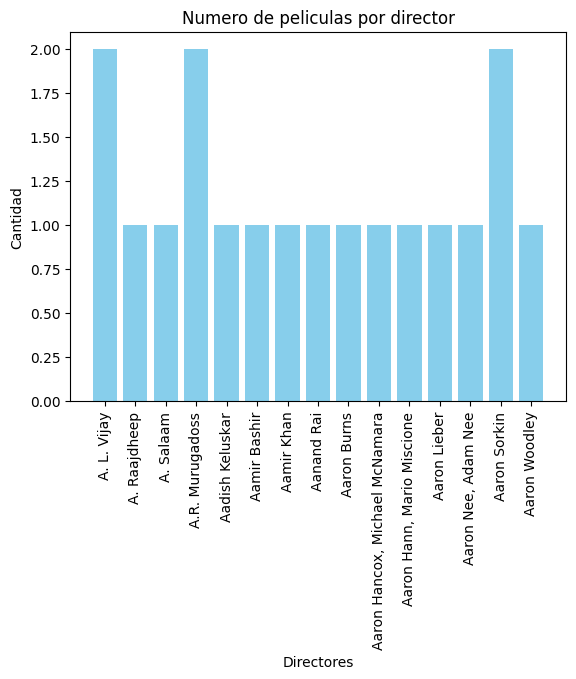

In [58]:
plt.bar(d['director_name'], d['count'], color='skyblue')
plt.xlabel('Directores')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.title('Numero de peliculas por director')
plt.show()

contenido por paises

In [59]:
country = df['country'].value_counts().reset_index().sort_values(by='country',ascending = False).head(60)
country

,index,country
0,United States,3240
1,India,1055
2,United Kingdom,638
3,Pakistan,419
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


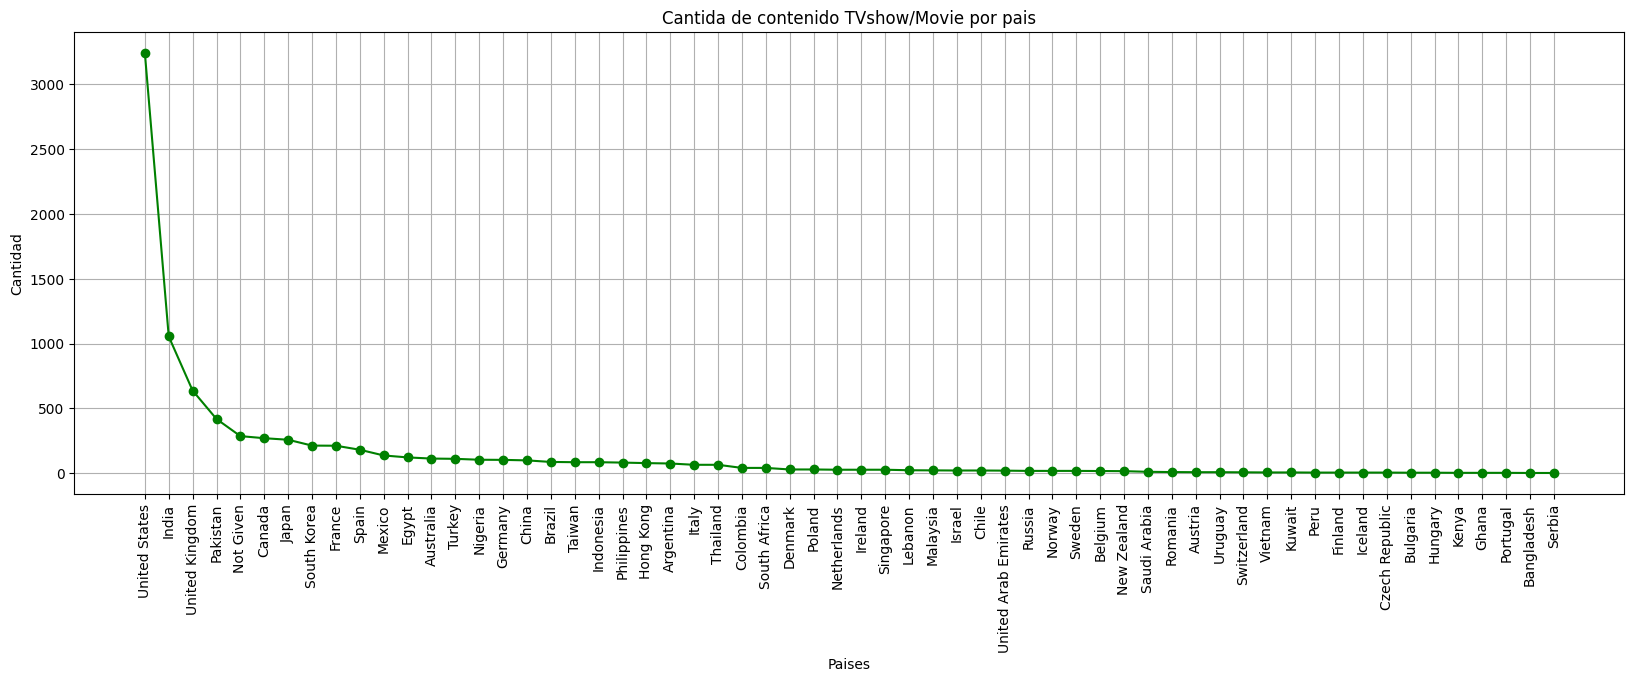

In [60]:
plt.figure(figsize=(20,6))
plt.plot(country['index'], country['country'], marker='o', color='green', linestyle='-')
plt.xlabel('Paises')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.title('Cantida de contenido TVshow/Movie por pais')
plt.grid(True)
plt.show()

Grafico 10 paises diferencianddo TVshows y Movies

In [61]:
top10=country.sort_values(by='country',ascending=False).head(10)
top10

,index,country
0,United States,3240
1,India,1055
2,United Kingdom,638
3,Pakistan,419
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


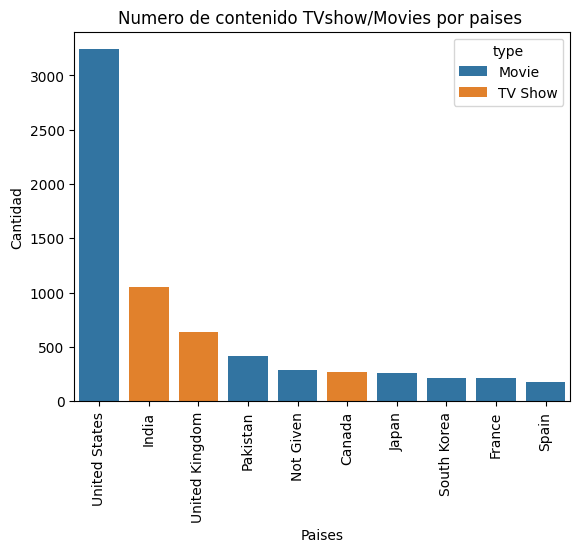

In [62]:
sns.barplot(data=top10, x=top10['index'], y=top10['country'], hue=df['type'])
plt.xlabel('Paises')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.title('Numero de contenido TVshow/Movies por paises ')
plt.show()

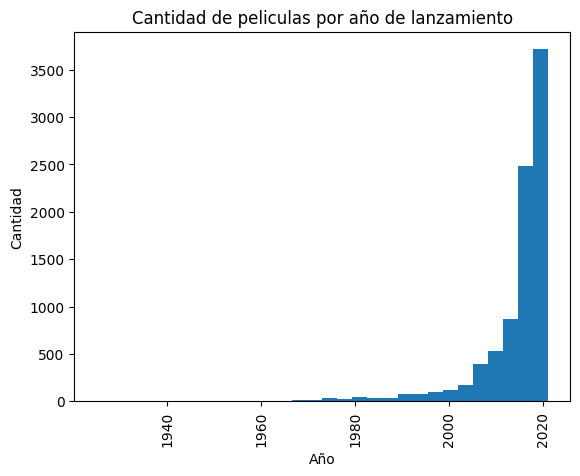

In [63]:
df['release_year'].plot(kind='hist', bins=30)
plt.xlabel('Año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas por año de lanzamiento')
plt.show()

contenido por rating

In [64]:
ratings = df.groupby(['rating','type'])['type'].count().reset_index(name='count')
ratings

,rating,type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,795
7,R,TV Show,2
8,TV-14,Movie,1425
9,TV-14,TV Show,728


top 10 peliculas por rating

In [65]:
top10rm = ratings[ratings['type']=='Movie'].sort_values(by='count', ascending=False).head(10)
top10rm

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1425
6,R,Movie,795
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


<function matplotlib.pyplot.show(close=None, block=None)>

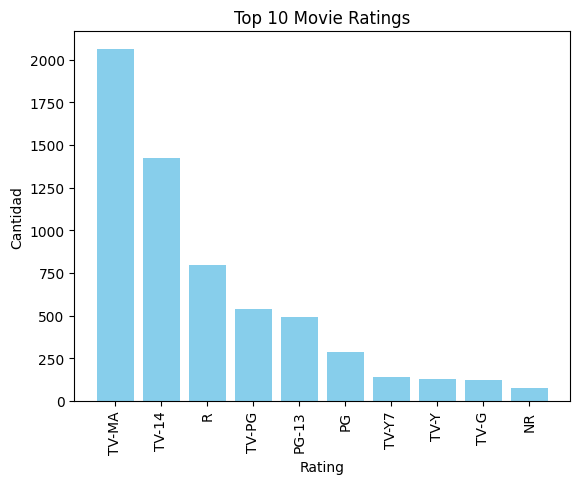

In [66]:
plt.bar(top10rm['rating'], top10rm['count'],color='skyblue')
plt.title('Top 10 Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show

top 10 TVshow por rating

In [67]:
top10rtv = ratings[ratings['type']=='TV Show'].sort_values(by='count', ascending=False).head(10)
top10rtv

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,728
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


<function matplotlib.pyplot.show(close=None, block=None)>

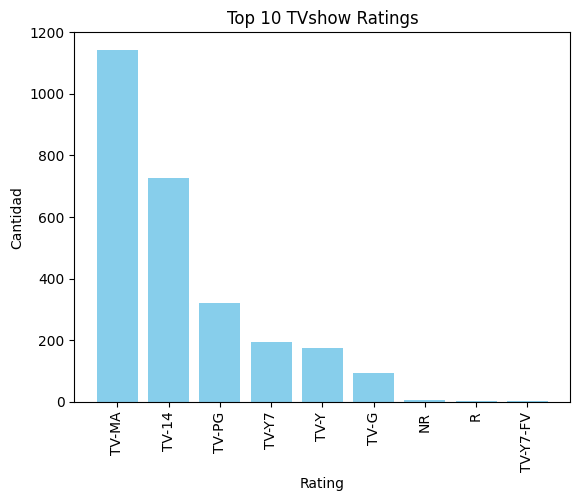

In [68]:
plt.bar(top10rtv['rating'], top10rtv['count'],color='skyblue')
plt.title('Top 10 TVshow Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show

Contenido por Duracion

In [69]:
duration = df.groupby(['duration', 'type']).size().reset_index(name='count')
duration

,duration,type,count
0,1 Season,TV Show,1789
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


top 10 movie por duracion

In [70]:
top10dm = duration[duration['type']=='Movie'].sort_values(by='count', ascending=False).head(10)
top10dm

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


<function matplotlib.pyplot.show(close=None, block=None)>

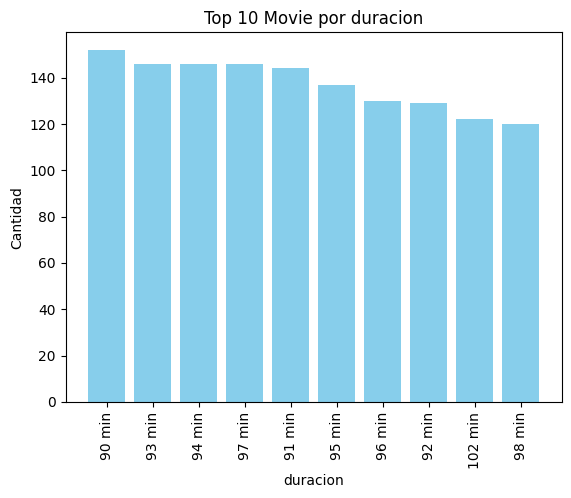

In [71]:
plt.bar(top10dm['duration'], top10dm['count'],color='skyblue')
plt.title('Top 10 Movie por duracion')
plt.xlabel('duracion')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show

top 10 TVshow por duracion

In [72]:
top10dtv = duration[duration['type']=='TV Show'].sort_values(by='count', ascending=False).head(10)
top10dtv

,duration,type,count
0,1 Season,TV Show,1789
110,2 Seasons,TV Show,421
138,3 Seasons,TV Show,198
151,4 Seasons,TV Show,94
162,5 Seasons,TV Show,64
174,6 Seasons,TV Show,33
185,7 Seasons,TV Show,23
196,8 Seasons,TV Show,17
208,9 Seasons,TV Show,9
1,10 Seasons,TV Show,6


<function matplotlib.pyplot.show(close=None, block=None)>

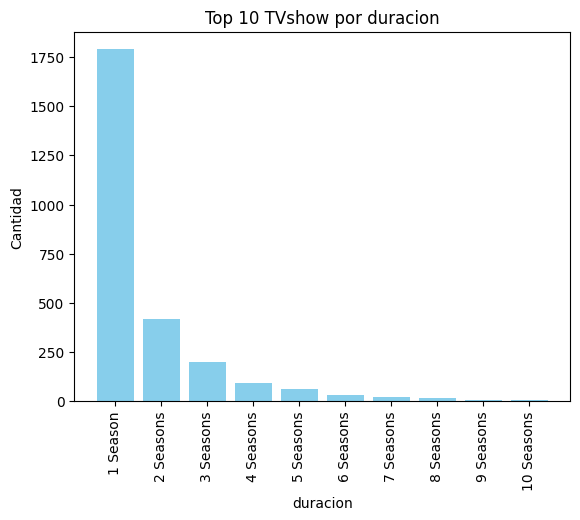

In [73]:
plt.bar(top10dtv['duration'], top10dtv['count'],color='skyblue')
plt.title('Top 10 TVshow por duracion')
plt.xlabel('duracion')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show

contenido por categoria

In [74]:
category = df.groupby(['Category','type']).size().reset_index(name='count')
category

,Category,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


top 10 movie por categoria

In [75]:
top10cm = category[category['type']=='Movie'].sort_values(by='count', ascending=False).head(10)
top10cm

,Category,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


<function matplotlib.pyplot.show(close=None, block=None)>

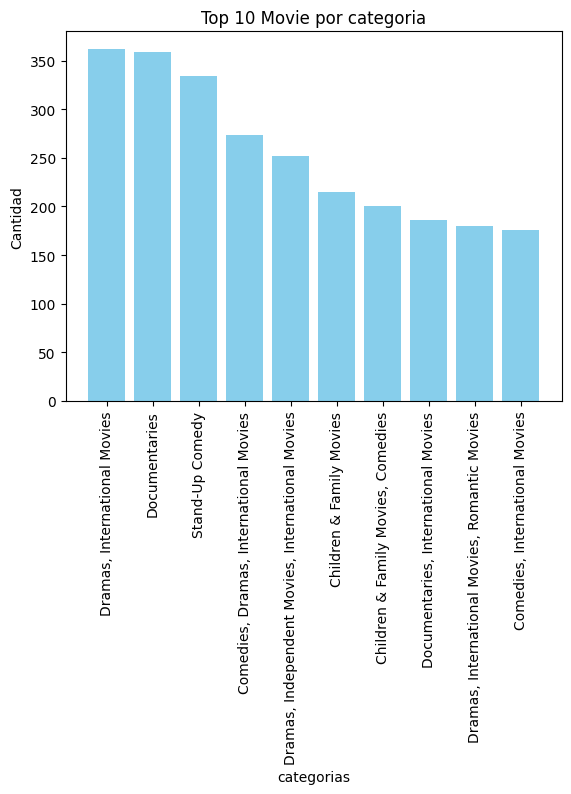

In [76]:
plt.bar(top10cm['Category'], top10cm['count'],color='skyblue')
plt.title('Top 10 Movie por categoria')
plt.xlabel('categorias')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show

top 10 TVshow por categoria

In [77]:
top10ctv = category[category['type']=='TV Show'].sort_values(by='count', ascending=False).head(10)
top10ctv

,Category,type,count
421,Kids' TV,TV Show,219
411,"International TV Shows, TV Dramas",TV Show,119
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
432,"Kids' TV, TV Comedies",TV Show,97
445,Reality TV,TV Show,95
392,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,87
290,Docuseries,TV Show,84
486,TV Comedies,TV Show,68


<function matplotlib.pyplot.show(close=None, block=None)>

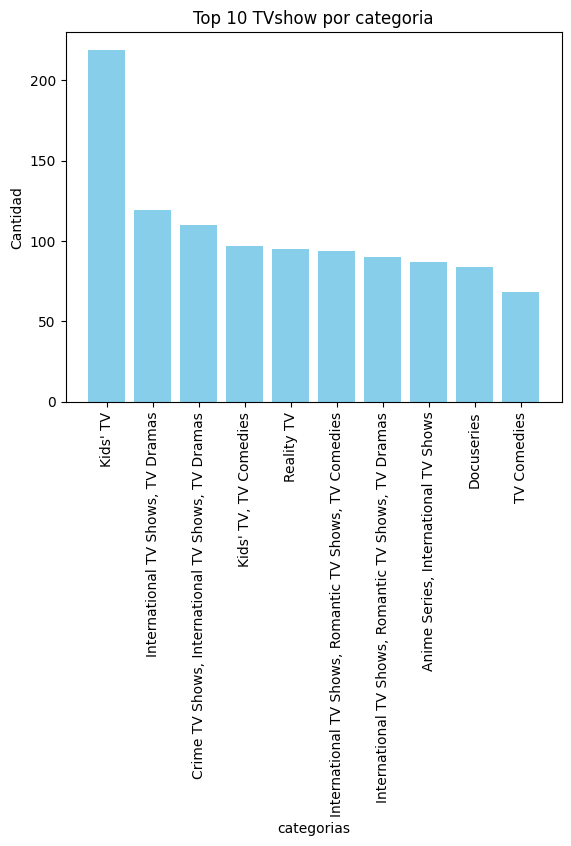

In [78]:
plt.bar(top10ctv['Category'], top10ctv['count'],color='skyblue')
plt.title('Top 10 TVshow por categoria')
plt.xlabel('categorias')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show